In [1]:
from network import Network
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_normalized = X_train / 255
X_train_flattened = X_train_normalized.reshape(X_train_normalized.shape[0], 784, 1)
X_test_normalized = X_test / 255
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], 784, 1)

In [4]:
y_train_encoded = np.zeros((y_train.size, y_train.max()+1))
y_train_encoded[np.arange(y_train.size), y_train] = 1
# y_train_encoded = y_train_encoded.reshape(y_train.shape[0], 10, 1)
y_test_encoded = np.zeros((y_test.size, y_test.max()+1))
y_test_encoded[np.arange(y_test.size), y_test] = 1

In [7]:
net = Network((784, 32, 16, 10))
net.stochastic_gradient_descent((None, "sigmoid", "sigmoid", "sigmoid"), X_train_flattened, y_train_encoded, 5, 10, 0.5)

Epoch 0 -> Loss: 0.3153791393450152, Accuracy: 0.78435
Epoch 1 -> Loss: 0.2823904887732297, Accuracy: 0.8060666666666667
Epoch 2 -> Loss: 0.2656260636668548, Accuracy: 0.81745
Epoch 3 -> Loss: 0.2327149458167684, Accuracy: 0.8428833333333333
Epoch 4 -> Loss: 0.21760862178528978, Accuracy: 0.8532833333333333


In [8]:
net.evaluate(X_test_flattened, y_test_encoded)

Test accuracy: 0.8367


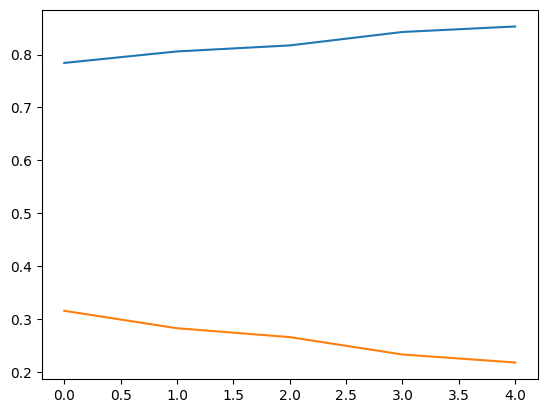

In [12]:
plt.plot(net.history["training accuracy"])
plt.plot(net.history["training loss"])